# Exercises
### CRUD operations:
#### 1: You will continue to work on the MCU network for a while. Who are the 10 fastest in the MCU ? Are they related to each other ?

In [55]:
import py2neo
graph = py2neo.Graph("bolt://localhost:7687", auth=("neo4j", "password_tuts"), name="mcu1")

query = """MATCH (n:Superhero)
WHERE (n.Speed) IS NOT NULL
RETURN n.name, n.Speed
ORDER BY n.Speed DESC
LIMIT 10"""

results = graph.run(query)

for record in results:
    print(record)

'Black Bolt'	100
'Stardust'	100
'Quicksilver'	100
'Nova'	100
'Thor'	92
'Silver Surfer'	84
'Galactus'	83
'Dormammu'	83
'Ego'	83
'Northstar'	83


In [56]:
import py2neo
graph = py2neo.Graph("bolt://localhost:7687", auth=("neo4j", "password_tuts"), name="mcu")

query = """MATCH (n:Superhero)-[r]-(m:Superhero)
WHERE n.name IN ['Black Bolt', 'Stardust', 'Quicksilver', 'Nova', 'Thor', 'Silver Surfer', 'Galactus', 'Dormammu', 'Ego', 'Northstar']
AND m.name IN ['Black Bolt', 'Stardust', 'Quicksilver', 'Nova', 'Thor', 'Silver Surfer', 'Galactus', 'Dormammu', 'Ego', 'Northstar']
RETURN n.name, m.name"""

results = graph.run(query)

for record in results:
    print(record)


'Ego'	'Galactus'
'Dormammu'	'Galactus'
'Black Bolt'	'Galactus'
'Northstar'	'Galactus'
'Nova'	'Galactus'
'Stardust'	'Galactus'
'Silver Surfer'	'Galactus'
'Quicksilver'	'Galactus'
'Thor'	'Galactus'
'Ego'	'Silver Surfer'
'Nova'	'Silver Surfer'
'Quicksilver'	'Silver Surfer'
'Black Bolt'	'Silver Surfer'
'Galactus'	'Silver Surfer'
'Dormammu'	'Silver Surfer'
'Stardust'	'Silver Surfer'
'Thor'	'Silver Surfer'
'Northstar'	'Thor'
'Ego'	'Thor'
'Silver Surfer'	'Thor'
'Nova'	'Thor'
'Black Bolt'	'Thor'
'Galactus'	'Thor'
'Quicksilver'	'Thor'
'Dormammu'	'Thor'
'Dormammu'	'Quicksilver'
'Ego'	'Quicksilver'
'Nova'	'Quicksilver'
'Galactus'	'Quicksilver'
'Black Bolt'	'Quicksilver'
'Northstar'	'Quicksilver'
'Silver Surfer'	'Quicksilver'
'Thor'	'Quicksilver'
'Quicksilver'	'Dormammu'
'Galactus'	'Dormammu'
'Thor'	'Dormammu'
'Silver Surfer'	'Dormammu'
'Galactus'	'Ego'
'Thor'	'Ego'
'Nova'	'Ego'
'Silver Surfer'	'Ego'
'Quicksilver'	'Ego'
'Black Bolt'	'Nova'
'Ego'	'Nova'
'Galactus'	'Nova'
'Silver Surfer'	'Nova'
'Qui

#### 2: How many have collaborated atleast more than 10 times with another superhero?

In [57]:
import py2neo
graph = py2neo.Graph("bolt://localhost:7687", auth=("neo4j", "password_tuts"), name="mcu")

query = """MATCH (a:Superhero)-[r:RELATION]-(b:Superhero)
WHERE r.n_collab >= 10
WITH a
MATCH (a)-[r:RELATION]-(b:Superhero)
WHERE r.n_collab >= 10
RETURN COUNT(DISTINCT a)"""

result = graph.run(query).evaluate()
print(f"{result} superheros have collaborated atleast more than 10 times with another superhero")


565 superheros have collaborated atleast more than 10 times with another superhero


#### 3:  Did the weakest of the MCU collaborated with the strongest ?

In [67]:
import py2neo
graph = py2neo.Graph("bolt://localhost:7687", auth=("neo4j", "password_tuts"), name="mcu1")

query_weakest = """MATCH (n:Superhero)
WHERE (n.Total) IS NOT NULL
RETURN n.name
ORDER BY n.Total
LIMIT 1"""
result_weakest = graph.run(query_weakest).evaluate()
print("Weakest of the MCU:",result_weakest)

query_strongest = """MATCH (n:Superhero)
WHERE (n.Total) IS NOT NULL
RETURN n.name
ORDER BY n.Total DESC
LIMIT 1"""
result_strongest = graph.run(query_strongest).evaluate()
print("Strongest of the MCU:",result_strongest,"\n")

query_relation = f"""MATCH (a:Superhero {{name: "{result_weakest}"}})-[r:RELATION]-(b:Superhero {{name: "{result_strongest}"}})
RETURN COUNT(r)"""
result_relation = graph.run(query_relation).evaluate()

if result_relation > 0:
    print(f"{result_weakest} a collaboré avec {result_strongest}")
else:
    print(f"{result_weakest} n'a pas collaboré avec {result_strongest}")


Weakest of the MCU: Lady Deathstrike
Strongest of the MCU Stardust 

Lady Deathstrike n'a pas collaboré avec Stardust


#### 5: Create a new db called "master". Create a graph from the M1 class with name and random age between 20 and 30, Group of 3 that collab (undirected relation).

In [47]:
import py2neo
import random
from faker import Faker

graph = py2neo.Graph("bolt://localhost:7687", auth=("neo4j", "password_tuts"), name="master")


noms = [Faker().first_name() for _ in range(9)]
personnes = [py2neo.Node("M1", name=nom, age=random.randint(20, 30)) for nom in noms]

for personne in personnes:
    graph.create(personne)

groupes = []
while len(personnes) >= 3:
    groupe = random.sample(personnes, 3)
    groupes.append(groupe)
    for personne in groupe:
        personnes.remove(personne)

for groupe in groupes:
    for i, j in zip(groupe, groupe[1:] + [groupe[0]]):
        relation = py2neo.Relationship(i, "collab", j)
        graph.create(relation)

#### 6: Get the age for people YOU collaborate with.
I'm not collaborating with anyone, but for the sake of the exercice, we'll say I'm collaborating with Ruth and Jasmine, and I'm Micheal (I generated random names, so names of classmates as well as mine are not in the database)

In [50]:
import py2neo
graph = py2neo.Graph("bolt://localhost:7687", auth=("neo4j", "password_tuts"), name="master")

query = """MATCH (a:M1 {name:"Michael"})-[:collab]-(b:M1)
RETURN b.name, b.age"""

results = graph.run(query)
print(results)


 b.name  | b.age 
---------|-------
 Ruth    |    28 
 Jasmine |    21 



#### 7: Get nodes with age > 25.

In [51]:
import py2neo
graph = py2neo.Graph("bolt://localhost:7687", auth=("neo4j", "password_tuts"), name="master")

query = """MATCH (a:M1)
WHERE a.age > 25
RETURN a.name, a.age"""

df = graph.run(query).to_data_frame()
print(df)

      a.name  a.age
0          A     29
1          D     26
2          G     29
3          I     27
4      Corey     26
5  Stephanie     29
6     Steven     27
7       Ruth     28


# Real World application 4
#### Change the database "neo4j" to the database "movie". Go to the browser and run on the browser console :play movie-graph then copy the queries on the console and run it. Congrats you just imported a brand new sample of data. Answer the following questions with cypher queries.

#### 1: How many actors played in more than 2 movie ? Get their names and year they were born.

In [71]:
import py2neo
graph = py2neo.Graph("bolt://localhost:7687", auth=("neo4j", "password_tuts"),name="movie")
query = """
MATCH (m:Movie)<-[:ACTED_IN]-(actor:Person)
WITH actor, count(m) AS numMovies
WHERE numMovies > 2
RETURN actor.name AS Name, actor.born AS YearOfBirth
"""
graph.run(query)

Name,YearOfBirth
Hugo Weaving,1960
Laurence Fishburne,1961
Carrie-Anne Moss,1967


#### 2: In how many movies did Tom hanks play ?

In [72]:
import py2neo

graph = py2neo.Graph("bolt://localhost:7687", auth=("neo4j", "password_tuts"), name="movie")

query = """
MATCH (m:Movie)<-[:ACTED_IN]-(actor:Person {name: "Tom Hanks"})
RETURN count(m) AS NumberOfMovies
"""
result = graph.run(query).evaluate()
print("Tom Hanks played in", result, "movies.")


Tom Hanks played in 12 movies.


#### 3: On average in how many movies do actors play in ?

In [92]:
import py2neo

graph = py2neo.Graph("bolt://localhost:7687", auth=("neo4j", "password_tuts"), name="movie")

query = """
MATCH (actor:Person)-[:ACTED_IN]->(movie:Movie)
WITH actor, count(movie) AS moviesCount
RETURN avg(moviesCount) AS averageMoviesCount
"""

result = graph.run(query).evaluate()
print("On average, actors play in", int(result), "movie(s).")


On average, actors play in 1 movie(s).


#### 4: On average how many actors are there in a movie ?

In [90]:
query = """
MATCH (movie:Movie)<-[:ACTED_IN]-(actor:Person)
WITH movie, count(actor) AS actorCount
RETURN avg(actorCount) AS averageActorCount
"""

result = graph.run(query).evaluate()
print("On average, there are", int(result), "actors in a movie.")


On average, there are 4 actors in a movie.


#### 5: In average how many writers is needed to write a movie ?

In [89]:
query = """
MATCH (P:Person)-[:WROTE]->(m:Movie)
WITH m, count(P) AS num_writers
RETURN avg(num_writers) AS average_num_writers
"""

result = graph.run(query).evaluate()

print("On average, there are", int(result), "writer(s) needed to write a movie.")

On average, there are 1 writer(s) needed to write a movie.


#### 6: What is the proportion of writers that also directed the movie ?

In [98]:
query = """ MATCH (w:Person)-[:WROTE]->(m:Movie)<-[:DIRECTED]-(d:Person)
WHERE w.name = d.name
WITH w, count(d) as num_directors
RETURN (toFloat(num_directors) / count(w)) as proportion """

results = graph.run(query).to_data_frame()
print("Proportion of writers that also directed the movie:", results['proportion'][0]*100)

Proportion of writers that also directed the movie: 25.0


#### 7: Do a histogram of the year of release for the movies.

C:\Users\Guest1\AppData\Local\Temp\ipykernel_32180\2505097704.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['year.released'])


<Axes: xlabel='year.released', ylabel='Density'>

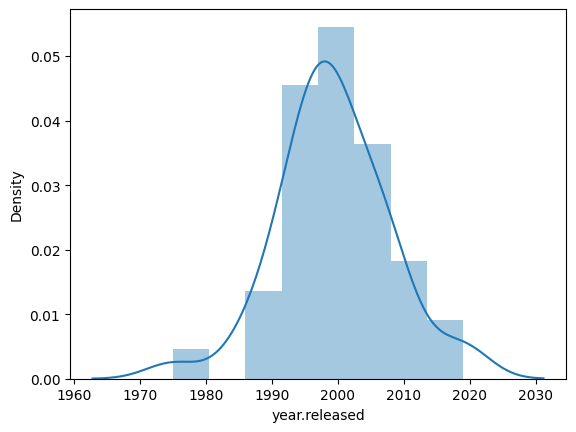

In [100]:
import seaborn as sns

%matplotlib inline
query =""" Match (year:Movie) return year.released """
data =graph.run(query).to_data_frame()
sns.distplot(data['year.released'])

#### 8: Who are the 10 actors with the most movie played in

In [105]:
query = """
MATCH (m:Movie)<-[:ACTED_IN]-(play:Person)
RETURN play.name AS actor_name, count(m) AS movie_count
ORDER BY movie_count DESC
LIMIT 10
"""

# Execute the query and get the results
results = graph.run(query)

# Print the results
print("Top 10 actors with the most movies played:")
for idx, record in enumerate(results):
    print(f"{idx + 1}. {record['actor_name']}: {record['movie_count']} movies")

Top 10 actors with the most movies played:
1. Tom Hanks: 12 movies
2. Keanu Reeves: 7 movies
3. Meg Ryan: 5 movies
4. Jack Nicholson: 5 movies
5. Hugo Weaving: 5 movies
6. Cuba Gooding Jr.: 4 movies
7. Kevin Bacon: 3 movies
8. Laurence Fishburne: 3 movies
9. Carrie-Anne Moss: 3 movies
10. Tom Cruise: 3 movies


#### 9: Delete every movie made by a director of your choosing

In [106]:
query = """ MATCH (d:Person {name: 'Andy Wachowski'})-[:DIRECTED]->(m:Movie)
DETACH DELETE m """

graph.run(query)

(No data)

#### 10: Give some statistics that you find interesting.

In [108]:
query = """
MATCH (m:Movie)
WHERE m.released = 2000
RETURN count(m) AS num_movies
"""

result = graph.run(query).evaluate()

print("Number of movies displayed in 2000:", result)


Number of movies displayed in 2000: 3
